# Project in the course DD2424 at KTH, using ALEXNET on the Oxford flower datasets. Author of the code: Badi Mirzai

In [1]:
# Author: Badi Mirzai
!pip install -q -U tensorflow_hub
!pip install -q tfds-nightly tensorflow matplotlib

     |████████████████████████████████| 4.0 MB 4.1 MB/s 


In [2]:
import tensorflow as tf 
import matplotlib.pyplot as plt 
from tensorflow.keras import datasets, layers, models, losses
import tensorflow_hub as hub

from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator

import tensorflow_datasets as tfds 

import numpy as np

In [3]:
# TODO: Load the dataset with TensorFlow Datasets.
dataset, dataset_info = tfds.load('oxford_flowers102', with_info=True, as_supervised=True)
dataset_info
# TODO: Create a training set, a validation set and a test set.
# t
training_set, test_set, validation_set = dataset['test'], dataset['train'], dataset['validation']
#test_set, training_set, validation_set = dataset['test'], dataset['train'], dataset['validation']
dataset_info


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/1020 [00:00<?, ? examples/s]

Shuffling oxford_flowers102-train.tfrecord...:   0%|          | 0/1020 [00:00<?, ? examples/s]

Generating test examples...:   0%|          | 0/6149 [00:00<?, ? examples/s]

Shuffling oxford_flowers102-test.tfrecord...:   0%|          | 0/6149 [00:00<?, ? examples/s]

Generating validation examples...:   0%|          | 0/1020 [00:00<?, ? examples/s]

Shuffling oxford_flowers102-validation.tfrecord...:   0%|          | 0/1020 [00:00<?, ? examples/s]

Dataset oxford_flowers102 downloaded and prepared to /root/tensorflow_datasets/oxford_flowers102/2.1.1. Subsequent calls will reuse this data.


tfds.core.DatasetInfo(
    name='oxford_flowers102',
    full_name='oxford_flowers102/2.1.1',
    description="""
    The Oxford Flowers 102 dataset is a consistent of 102 flower categories commonly occurring
    in the United Kingdom. Each class consists of between 40 and 258 images. The images have
    large scale, pose and light variations. In addition, there are categories that have large
    variations within the category and several very similar categories.
    
    The dataset is divided into a training set, a validation set and a test set.
    The training set and validation set each consist of 10 images per class (totalling 1020 images each).
    The test set consists of the remaining 6149 images (minimum 20 per class).
    
    Note: The dataset by default comes with a test size larger than the train
    size. For more info see this [issue](https://github.com/tensorflow/datasets/issues/3022).
    """,
    homepage='https://www.robots.ox.ac.uk/~vgg/data/flowers/102/',
    data

#Explore 102 label dataset

In [4]:

# TODO: Get the number of examples in each set from the dataset info.
num_training_examples = 0
num_validation_examples = 0
num_test_examples = 0

for example in training_set:
  num_training_examples += 1

for example in validation_set:
  num_validation_examples += 1

for example in test_set:
  num_test_examples += 1

print('Total Number of Training Images: {}'.format(num_training_examples))
print('Total Number of Validation Images: {}'.format(num_validation_examples))
print('Total Number of Test Images: {} \n'.format(num_test_examples))
# TODO: Get the number of classes in the dataset from the dataset info.
num_classes = dataset_info.features['label'].num_classes
print('Total Number of Classes: {}'.format(num_classes))


Total Number of Training Images: 6149
Total Number of Validation Images: 1020
Total Number of Test Images: 1020 

Total Number of Classes: 102


#Check the shapes of images (102 label)

In [5]:
# TODO: Print the shape and corresponding label of 3 images in the training set.
# The images in the Flowers dataset are not all the same size.
for i, example in enumerate(training_set.take(3)):
  print('Image {} shape: {} label: {}'.format(i+1, example[0].shape, example[1]))

Image 1 shape: (542, 500, 3) label: 40
Image 2 shape: (748, 500, 3) label: 76
Image 3 shape: (500, 600, 3) label: 42


#Display Image (of 102 label dataset)

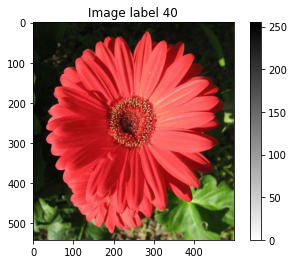

In [6]:
# TODO: Plot 1 image from the training set. Set the title 
# of the plot to the corresponding image label. 
for image, label in training_set.take(1):
  break
image = image.numpy()
plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.title('Image label {}'.format(label))
plt.colorbar()
plt.grid(False)
plt.show()


#Preprocess data

In [7]:
def resize_normalize(image,label):
  image = tf.cast(image,tf.float32)  
  image = tf.image.resize(image,(IMG_SIZE,IMG_SIZE))
  image = image / 255.0
  return image,label
IMG_SIZE = 224
IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)

BATCH_SIZE = 64

train_batches = training_set.shuffle(num_training_examples).map(resize_normalize).batch(BATCH_SIZE)
validation_batches = validation_set.map(resize_normalize).batch(BATCH_SIZE)
test_batches = test_set.map(resize_normalize).batch(BATCH_SIZE)


for i, example in enumerate(train_batches.take(4)):
  print('Image {} shape: {} label: {}'.format(i+1, example[0].shape, example[1]))


Image 1 shape: (64, 224, 224, 3) label: [85 50 32 77 82 43 73 88 70 10 72 42 51 60 72 76 97 58 61 49 96 84 80  1
 73 49 19 28 97 84 35 71 91 55  7 61 93 97 47 57 81 88 50 94 65 46 75 57
 87 85 54 77 82 88 80 55 27 43 49 29 22 77 62 11]
Image 2 shape: (64, 224, 224, 3) label: [83 32 80 37 34 59 21 14 80 30 43 88  1 83 65 41 94 93 80 45 76 78 40 65
 35 89 52 88 81 36 43 79 18 73 93 93 10 13 60  3 45  7 16 79 45 88  3 26
 55 88 93 50 81 50 29 17 70 64 77 72 60 80 21 91]
Image 3 shape: (64, 224, 224, 3) label: [ 85  57  76  83   5  39  78  72  94  84  94  21  76  70  94  44  76  27
  41  59  17  14  16  49  50  74 100  19  57  21  50  23  48  93  48  45
  57  50  72  52  56  22  45  36  11  54  19  58  39  11  50  16  50  88
  59  94  94  51  93  29  77  88  26  50]
Image 4 shape: (64, 224, 224, 3) label: [54 30 93 88 89 87 10 59 97 88 93 17 22 91 82 39  9 93 80 83 62 57 71 28
 47 49 30 73 58 67 15 40 72 80 66 82 83 28 57 73 56 52 37 59 42 87 43 77
 90 65 36 20 22 77 53 90 43 75 93 81 97 6

In [8]:
num_training_examples

6149

In [9]:
type(train_batches)

tensorflow.python.data.ops.dataset_ops.BatchDataset

#Display reshaped image (102 label dataset)

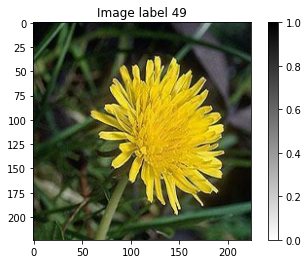

In [10]:
for image, label in train_batches.take(1):
  break
image = image.numpy()
plt.figure()
plt.imshow(image[0], cmap=plt.cm.binary)
plt.title('Image label {}'.format(label[0]))
plt.colorbar()
plt.grid(False)
plt.show()

In [11]:

num_classes = dataset_info.features['label'].num_classes
# taken from https://colab.research.google.com/github/the-deep-learners/deep-learning-illustrated/blob/master/notebooks/alexnet_in_keras.ipynb#scrollTo=dOidSBLdgIcj
model = models.Sequential()
#model.add(layers.experimental.preprocessing.Resizing(224, 224, interpolation="bilinear", input_shape=x_train.shape[1:]))
#feature_extractor
#model.add(layers.Conv2D(96, 11, activation='relu', strides=4, padding='same'))

# for data augmentation
#layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical")
#layers.experimental.preprocessing.RandomRotation(0.2)
#layers.experimental.preprocessing.RandomZoom(0.2)

model.add(layers.Conv2D(96, kernel_size=(11, 11), strides=4, activation='relu', input_shape=(224, 224, 3)))



model.add(layers.MaxPooling2D(pool_size=(3,3), strides=(2, 2)))
model.add(layers.BatchNormalization())
#model.add(layers.Dropout(0.4))
model.add(layers.Conv2D(256, kernel_size=(5, 5), activation='relu'))
#model.add(layers.Dropout(0.4))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
model.add(layers.BatchNormalization())
#model.add(layers.Dropout(0.4))

model.add(layers.Conv2D(256, kernel_size=(3, 3), activation='relu'))
#model.add(layers.Dropout(0.4))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(384, kernel_size=(3, 3), activation='relu'))
#model.add(layers.Dropout(0.4))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(384, kernel_size=(3, 3), activation='relu'))
#model.add(layers.Dropout(0.4))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

model.add(layers.BatchNormalization())
#model.add(layers.Dropout(0.4))
model.add(layers.Flatten())
model.add(layers.Dense(4096, activation='relu'))
model.add(layers.BatchNormalization())
#model.add(layers.Dropout(0.4))
model.add(layers.Dense(4096, activation='relu'))
#model.add(layers.Dropout(0.4))
model.add(layers.BatchNormalization())

#model.add(layers.Dense(17, activation='softmax'))
model.add(layers.Dense(102, activation='softmax'))
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 54, 54, 96)        34944     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 26, 26, 96)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 26, 96)        384       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 256)       614656    
_________________________________________________________________
batch_normalization_1 (Batch (None, 22, 22, 256)       1024      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 256)       0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 10, 10, 256)       1

In [12]:
model.compile(optimizer='adam', loss=losses.sparse_categorical_crossentropy, metrics=['accuracy'])
#opt = model.optimizers.SGD(learning_rate=0.01)

#model.compile(optimizer=opt, loss=losses.sparse_categorical_crossentropy, metrics=['accuracy'])


#102 label training

In [13]:
history = model.fit(train_batches, epochs=40, batch_size = 64,  validation_data=test_batches, shuffle=True)

Epoch 1/40
97/97 [==============================] - 60s 220ms/step - loss: 4.7206 - accuracy: 0.1460 - val_loss: 4.7198 - val_accuracy: 0.0451
Epoch 2/40
97/97 [==============================] - 27s 196ms/step - loss: 3.4597 - accuracy: 0.2560 - val_loss: 4.9744 - val_accuracy: 0.0745
Epoch 3/40
97/97 [==============================] - 28s 201ms/step - loss: 3.3403 - accuracy: 0.3018 - val_loss: 7.3012 - val_accuracy: 0.0853
Epoch 4/40
97/97 [==============================] - 27s 198ms/step - loss: 3.1369 - accuracy: 0.3410 - val_loss: 9.8374 - val_accuracy: 0.1412
Epoch 5/40
97/97 [==============================] - 26s 192ms/step - loss: 3.1940 - accuracy: 0.3500 - val_loss: 12.7918 - val_accuracy: 0.0824
Epoch 6/40
97/97 [==============================] - 27s 195ms/step - loss: 2.7198 - accuracy: 0.4150 - val_loss: 6.2477 - val_accuracy: 0.1686
Epoch 7/40
97/97 [==============================] - 27s 195ms/step - loss: 2.7080 - accuracy: 0.4155 - val_loss: 5.2076 - val_accuracy: 0.272

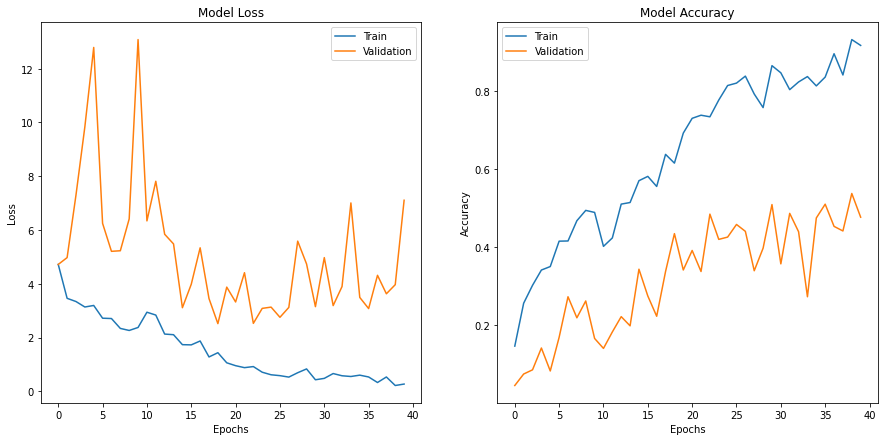

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(15,7))

axs[0].plot(history.history['loss'])
axs[0].plot(history.history['val_loss'])
axs[0].title.set_text('Model Loss')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].legend(['Train', 'Validation'])
#axs[0].legend(['Train', 'Test'])

axs[1].plot(history.history['accuracy'])
axs[1].plot(history.history['val_accuracy'])
axs[1].title.set_text('Model Accuracy')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')
axs[1].legend(['Train', 'Validation'])
#axs[1].legend(['Train', 'Test'])

#images_dir = '/content/drive/MyDrive/Deep learning project files/results 17 category/adam base model'

#images_dir = '/content/drive/MyDrive/Deep learning project files/results 17 category/dropout fully layers'
#images_dir = '/content/drive/MyDrive/Deep learning project files/results 17 category/dropout conv layers'
#images_dir = '/content/drive/MyDrive/Deep learning project files/results 17 category/dropout all layers'
#images_dir = '/content/drive/MyDrive/Deep learning project files/results 17 category/batchnorm'
#images_dir = '/content/drive/MyDrive/Deep learning project files/results 17 category/data augmentation'

#images_dir = '/content/drive/MyDrive/Deep learning project files/results 17 category/data augmentation with dropout'


#images_dir = '/content/drive/MyDrive/Deep learning project files/results 102 category/adam base model'
#images_dir = '/content/drive/MyDrive/Deep learning project files/results 102 category/batchnorm'
#images_dir = '/content/drive/MyDrive/Deep learning project files/results 102 category/dropout all layers'
images_dir = '/content/drive/MyDrive/Deep learning project files/results 102 category/dropout conv layers'
#images_dir = '/content/drive/MyDrive/Deep learning project files/results 102 category/dropout full layers'
#images_dir = '/content/drive/MyDrive/Deep learning project files/results 102 category/data augmentation'
#images_dir = '/content/drive/MyDrive/Deep learning project files/results 102 category/data augmentation with batchnorm'

#plt.savefig(f"{images_dir}/training plots.pdf")


# 102 label test performance

In [15]:
#model.evaluate(test_batches)
model.evaluate(validation_batches)

16/16 [==============================] - 4s 237ms/step - loss: 3.0610 - accuracy: 0.4990


[3.060966730117798, 0.499019593000412]

#Mount Drive

In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive
